<a href="https://colab.research.google.com/github/yakkunn7422/public_colab/blob/main/torchvision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# https://www.kikagaku.co.jp/kikagaku-blog/pytorch-torchvision/#i-23
# モジュールのインポート
import matplotlib.pyplot as plt
from torchvision import transforms as transforms
import torch
import torchvision
import numpy as np

# 描画用の関数(チャンネル数の関係で、グレースケール画像とカラー画像で表示を分けています！)
def show_image(x):
  fig = plt.figure(figsize=(10,10))

  for s in range(len(x)):
      img = x[s]
      npimg = img.numpy()
      if npimg.shape[0]==1 :  # グレースケール用
        npimg = npimg.reshape(32, 32)
        ax1 = fig.add_subplot(1, len(x), s+1)
        plt.axis('off')
        plt.imshow(npimg, cmap='gray')
      else :  # カラー用
        npimg = np.transpose(npimg, (1, 2, 0))
        ax1 = fig.add_subplot(1, len(x), s+1)
        plt.axis('off')
        plt.imshow(npimg)

# CIFAR10 をダウンロード
cifar10set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
cifar10loader = torch.utils.data.DataLoader(cifar10set, batch_size=3, shuffle=False)

100%|██████████| 170M/170M [00:02<00:00, 62.2MB/s]


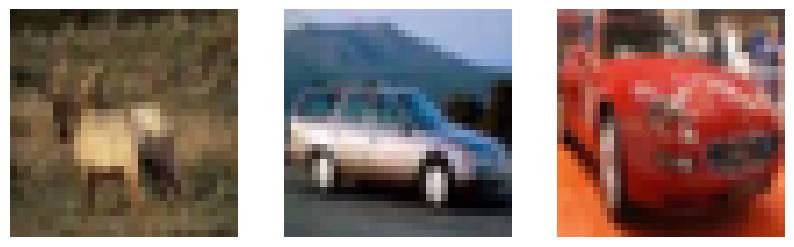

In [3]:
#オリジナル
iter_ = iter(cifar10loader)
x, t = next(iter_)
x, t = next(iter_)  # &lt;- 2回繰り返してるのはカエルの画像が嫌だからです！

show_image(x)

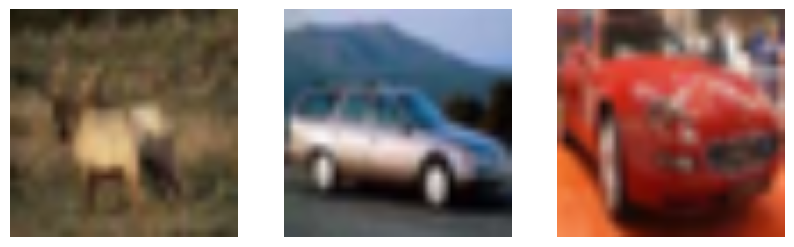

In [6]:
transform = transforms.Resize(size=(100, 100))
transed_x = transform(x)

show_image(transed_x)

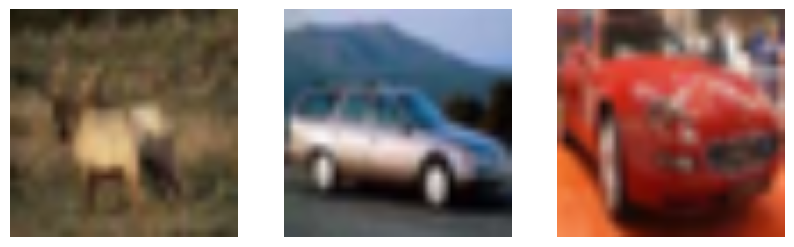

In [11]:
transform = transforms.CenterCrop(size=(20, 20))
transform = transforms.Resize(size=(100, 100))
transed_x = transform(x)

show_image(transed_x)